<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/1_3_3GenvsFlat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081))])

train_dataset = torchvision.datasets.MNIST('mnist_data/', train=True, download=True, transform=transform)

# train_labels = train_dataset.targets.numpy()


test_dataset = torchvision.datasets.MNIST('mnist_data/', train=False, download=True, transform=transform)
trainloader1 = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader1 = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)  


trainloader2 = torch.utils.data.DataLoader(train_dataset, batch_size= 512, shuffle=True)
testloader2 = torch.utils.data.DataLoader(test_dataset, batch_size=512, shuffle=False)  



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



In [2]:
# Define the DNN model
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, loss function, and optimizer


In [3]:
model1 = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.6)
  
train_losses1 = []
train_accuracies1 = []
test_losses1 = []
test_accuracy1 = []

for epoch in range(5):
  total = 0
  correct = 0
  total_loss = 0
  for batch_idx, (images, labels) in enumerate(trainloader1):
    optimizer.zero_grad()
    outputs = model1(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    total_loss += loss.item() 
  train_losses1.append(total_loss/total)
  train_accuracies1.append(100* correct/total)
  correct = 0
  total = 0
  with torch.no_grad():
    losses= []
    total_loss = 0
    for data in testloader1:
      images, labels = data
      outputs = model1(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      total_loss += loss.item()
    test_accuracy1.append(100 *correct/total)
    test_losses1.append(total_loss/total)
  print("Model {} Training Done".format(epoch))
    

Model 0 Training Done
Model 1 Training Done
Model 2 Training Done
Model 3 Training Done
Model 4 Training Done


In [4]:
model2 = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.6)
  
train_losses2 = []
train_accuracies2 = []
test_losses2 = []
test_accuracy2 = []

for epoch in range(5):
  total = 0
  correct = 0
  total_loss = 0
  for batch_idx, (images, labels) in enumerate(trainloader2):
    optimizer.zero_grad()
    outputs = model2(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    total_loss += loss.item() 
  train_losses2.append(total_loss/total)
  train_accuracies2.append(100* correct/total)
  correct = 0
  total = 0
  with torch.no_grad():
    losses= []
    total_loss = 0
    for data in testloader2:
      images, labels = data
      outputs = model1(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      total_loss += loss.item()
    test_accuracy2.append(100 *correct/total)
    test_losses2.append(total_loss/total)
  print("Model {} Training Done".format(epoch))
    

Model 0 Training Done
Model 1 Training Done
Model 2 Training Done
Model 3 Training Done
Model 4 Training Done


In [5]:
def linear_interpolation(alpha,theta1,theta2):
    temp_theta = {}
    for key in theta1.keys():
        temp_theta[key] = (1 - alpha) * theta1[key] + alpha * theta2[key]
    return (temp_theta)

In [6]:
start = 0
stop = 0.05
step = 0.01

alphas = list(range(int(start/step), int(stop/step)+1))

In [14]:

Inter_train_losses1 = []
Inter_train__accuracies1 = [] 

Inter_test_losses1 = []
Inter_test_accuracies1 = []

for alpha in alphas:
    Inter_model1 = DNN()
    Inter_model1.load_state_dict(linear_interpolation(alpha,model1.state_dict(),model1.state_dict()))
        
    
    for epoch in range(5):
      total = 0
      correct = 0
      total_loss = 0
      for batch_idx, (images, labels) in enumerate(trainloader1):
        optimizer.zero_grad()
        outputs = Inter_model1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_loss += loss.item() 
      Inter_train_losses1.append(total_loss/total)
      Inter_train__accuracies1.append(100* correct/total)
      correct = 0
      total = 0
      with torch.no_grad():
        losses= []
        total_loss = 0
        for data in testloader1:
          images, labels = data
          outputs = Inter_model1(images)
          loss = criterion(outputs, labels)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
      correct += (predicted == labels).sum().item()
      total_loss += loss.item()
      Inter_test_losses1.append(100 *correct/total)
      Inter_test_accuracies1.append(total_loss/total)
    print("Model {} Training Done".format(epoch))
    

Model 4 Training Done
Model 4 Training Done
Model 4 Training Done
Model 4 Training Done
Model 4 Training Done
Model 4 Training Done


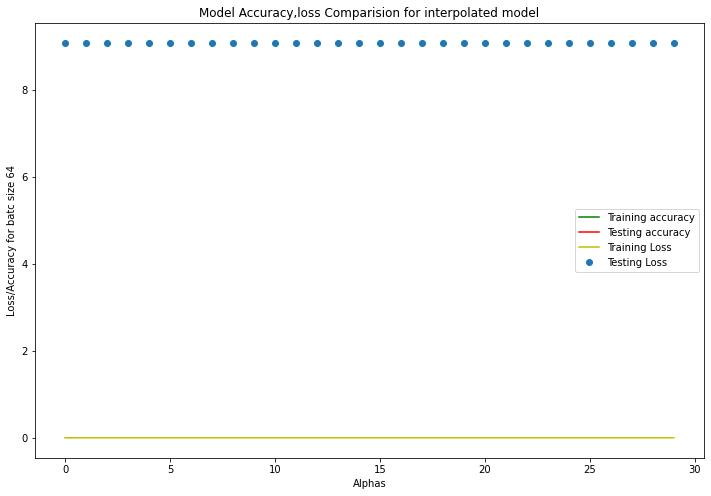

In [16]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Accuracy,loss Comparision for interpolated model')
ax.plot(np.array(Inter_train__accuracies1[1])/100, 'g', label='Training accuracy')
ax.plot(np.array(Inter_test_accuracies1[1])/100, 'r', label='Testing accuracy')
ax.plot(Inter_train_losses1, 'y', label='Training Loss')
ax.plot(Inter_test_losses1, 'o', label='Testing Loss')

ax.legend()

ax.set_xlabel('Alphas')
ax.set_ylabel('Loss/Accuracy for batc size 64')
plt.show()